In [58]:
import pandas as pd
import numpy as np
import string
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

In [4]:
# nltk.download() - install punkt package

In [5]:
ratings_csv = pd.read_csv("MSU_ratings.csv")
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [6]:
# drop all ratings with no comments 
ratings_csv = ratings_csv.drop(ratings_csv[ratings_csv["comments"] == "No Comments"].index)
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [87]:
# comments become our x dataset
x = ratings_csv["comments"]
# dataset in split for (3,4,5) is the positive class and (1,2) is the negative class
y = ratings_csv["quality"]>=3

In [103]:
# https://www.geeksforgeeks.org/python-stemming-words-with-nltk/

def stem_comments(text):
    stemmer = PorterStemmer()
    stemmed_words = []

    for comment in text:
        words = word_tokenize(str(comment))
        
        for word in words:
            if word in string.punctuation:
                continue
            stemmed_words.append(stemmer.stem(word)) 

    return np.array(stemmed_words)      

In [104]:
def top_n_stem_words(text, n):
    stem_words = stem_comments(text)
    freq = collections.Counter(stem_words)
    
    return freq.most_common(n)

In [105]:
top_15 = top_n_stem_words(x, 15)

Text(0, 0.5, 'Count')

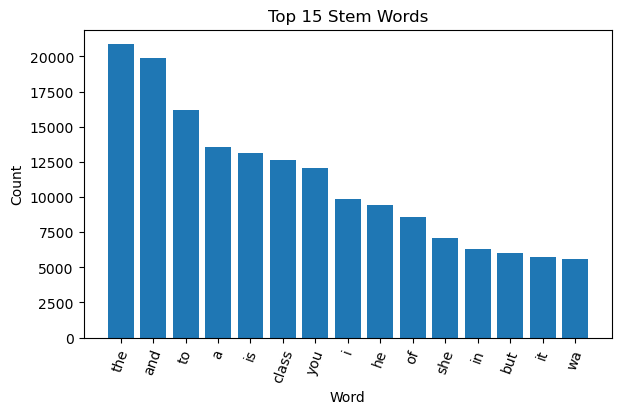

In [106]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Stem Words")
plt.bar([a[0] for a in top_15], [a[1] for a in top_15])
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

In [107]:
# THIS IS modfied from SVM_MODEL.IPYNB 
def get_top_n_words(text, n, stop_words = False):
    if stop_words:
        vectorizer = CountVectorizer(stop_words="english")
    else:
        vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(text)
    
    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Calculate the word frequencies
    word_frequencies = X.toarray().sum(axis=0)
    
    # Sort the words by frequency in descending order
    sorted_words = sorted(zip(feature_names, word_frequencies), key=lambda x: x[1], reverse=True)

    # # Get the top n words
    # top_n_words = np.array(sorted_words[:n])
    return [x[0] for x in sorted_words]

In [108]:
x_no_stop = get_top_n_words(x, 15, stop_words=True)

In [109]:
top_15_no_stop = top_n_stem_words(x_no_stop, 15)
top_15_no_stop

[('commun', 11),
 ('gener', 10),
 ('inform', 9),
 ('interact', 9),
 ('continu', 9),
 ('attend', 8),
 ('organ', 8),
 ('respect', 8),
 ('present', 8),
 ('consist', 8),
 ('assign', 7),
 ('studi', 7),
 ('person', 7),
 ('requir', 7),
 ('practic', 7)]

Text(0, 0.5, 'Count')

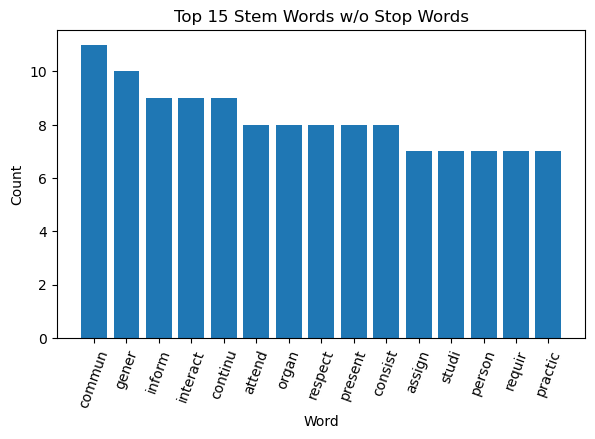

In [110]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Stem Words w/o Stop Words")
plt.bar([a[0] for a in top_15_no_stop], [a[1] for a in top_15_no_stop])
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

In [114]:
#positive ratings
pos_stem = top_n_stem_words(x[y], 15)
x_no_stop = get_top_n_words(x[y], 15, stop_words=True)
pos_stem_no_stop = top_n_stem_words(x_no_stop, 15)


Text(0, 0.5, 'Count')

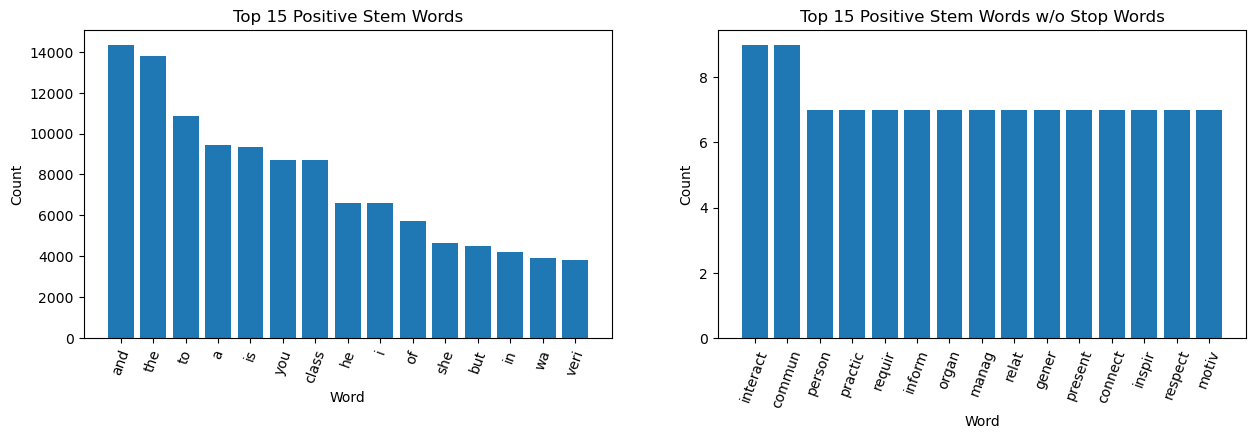

In [115]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Positive Stem Words")
plt.bar([a[0] for a in pos_stem], [a[1] for a in pos_stem])
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Top 15 Positive Stem Words w/o Stop Words")
plt.bar([a[0] for a in pos_stem_no_stop], [a[1] for a in pos_stem_no_stop])
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

In [116]:
# negative results
neg_stem = top_n_stem_words(x[~y], 15)
x_no_stop = get_top_n_words(x[~y], 15, stop_words=True)
neg_stem_no_stop = top_n_stem_words(x_no_stop, 15)

Text(0, 0.5, 'Count')

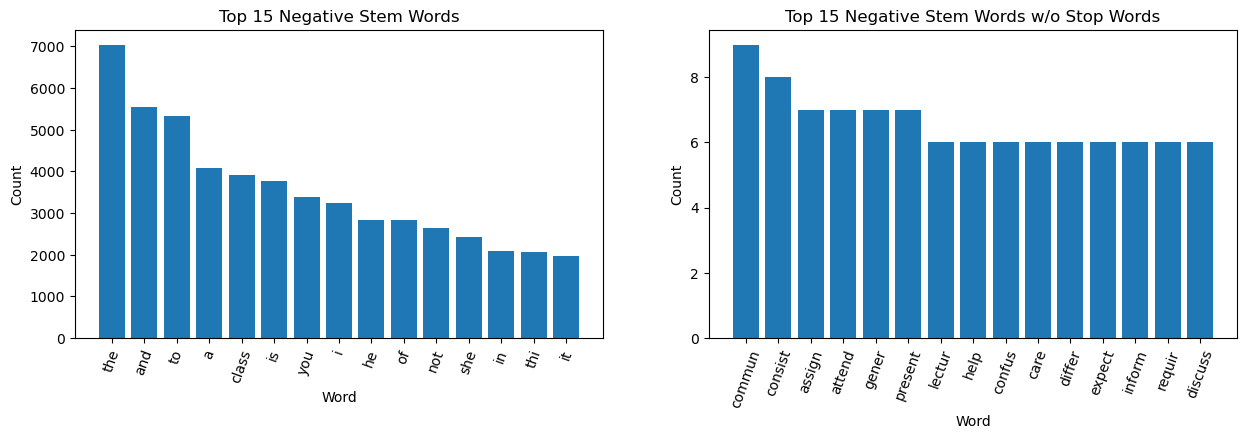

In [117]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Negative Stem Words")
plt.bar([a[0] for a in neg_stem], [a[1] for a in neg_stem])
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Top 15 Negative Stem Words w/o Stop Words")
plt.bar([a[0] for a in neg_stem_no_stop], [a[1] for a in neg_stem_no_stop])
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")